<a href="https://colab.research.google.com/github/laveena-majeed/Uber-Supply-_Demand-Gap-Analysis/blob/main/Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Supply–Demand Gap Analysis

## Exploratory Data Analysis (EDA)

This project focuses on analyzing Uber ride request data to identify gaps between customer demand and driver supply.
The objective is to understand time-based and location-based patterns that lead to ride cancellations and unfulfilled requests.
The analysis is performed using Python for data exploration, SQL for querying insights, and Excel for dashboard visualization.



## Problem Statement

Uber often faces situations where customer ride requests are either cancelled by drivers or remain unfulfilled due to the unavailability of cabs.
These issues tend to occur during specific time periods and at certain pickup locations.
The aim of this analysis is to identify when and where these supply–demand gaps occur and to suggest data-driven solutions to reduce them.


## Dataset Description

The dataset consists of 6,745 Uber ride requests.
It contains information such as request ID, pickup point, driver ID, ride status, request timestamp, and drop timestamp.
The ride status is classified into three categories: Completed, Cancelled, and No Cars Available.
This dataset enables the analysis of both fulfilled and unfulfilled ride demand.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("Uber Request Data.csv")


In [ ]:
df.head()
df.shape


(6745, 6)

In [ ]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


The dataset contains 6 columns and 6,745 ride requests.
The Driver id and Drop timestamp columns have missing values, which correspond to cancelled rides and cases where no cab was available.

In [ ]:
df['Request timestamp'] = pd.to_datetime(
    df['Request timestamp'],
    dayfirst=True,
    errors='coerce'
)

df['Drop timestamp'] = pd.to_datetime(
    df['Drop timestamp'],
    dayfirst=True,
    errors='coerce'
)


In [ ]:
df.dtypes


,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,datetime64[ns]
Drop timestamp,datetime64[ns]


In [ ]:
df[['Request timestamp', 'Drop timestamp']].head()


,Request timestamp,Drop timestamp
0,2016-07-11 11:51:00,2016-07-11 13:00:00
1,2016-07-11 17:57:00,2016-07-11 18:47:00
2,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2016-07-12 21:08:00,2016-07-12 22:03:00
4,NaT,NaT


The timestamp columns follow a day-first date format. Parsing with dayfirst=True ensures accurate extraction of hour and time-based patterns.

In [ ]:
df['Hour'] = df['Request timestamp'].dt.hour
df['Day'] = df['Request timestamp'].dt.day_name()


In [ ]:
def timeslot(hour):
    if 0 <= hour < 5:
        return 'Early Morning'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Hour'] = df['Request timestamp'].dt.hour
df['TimeSlot'] = df['Hour'].apply(timeslot)


In [ ]:
df['Status'].value_counts()


,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [ ]:
pd.crosstab(df['TimeSlot'], df['Status'])


Status,Cancelled,No Cars Available,Trip Completed
TimeSlot,,,
Afternoon,42,76,218
Early Morning,21,105,77
Evening,52,454,255
Morning,361,192,461
Night,788,1823,1820


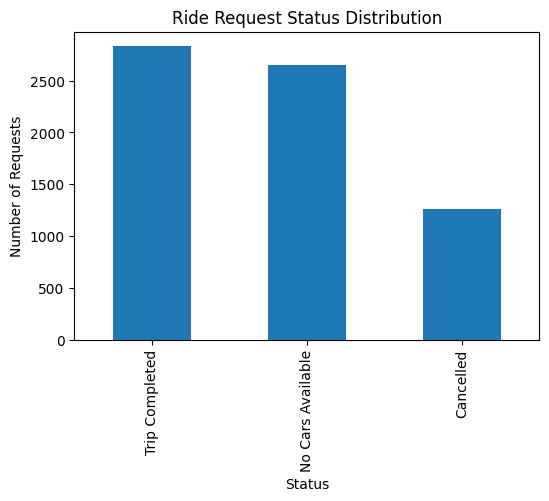

In [ ]:
plt.figure(figsize=(6,4))
df['Status'].value_counts().plot(kind='bar')
plt.title('Ride Request Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Requests')
plt.show()


A significant portion of ride requests are either cancelled by drivers or fail due to unavailability of cabs, highlighting operational inefficiencies.

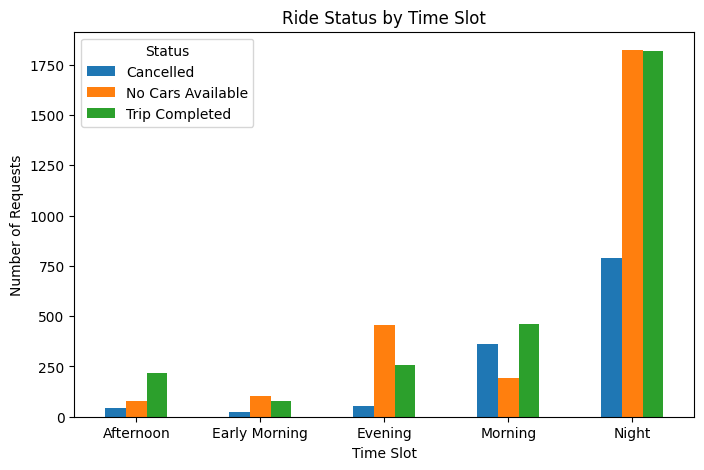

In [ ]:
timeslot_status = pd.crosstab(df['TimeSlot'], df['Status'])

timeslot_status.plot(kind='bar', figsize=(8,5))
plt.title('Ride Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.show()


Early Morning and Morning time slots show high ride cancellations, whereas Night hours experience the highest number of unfulfilled requests due to cab unavailability.

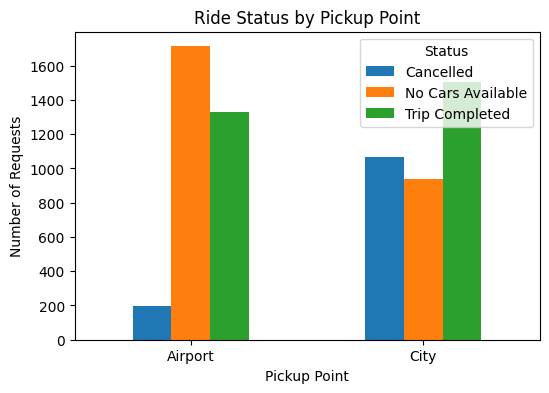

In [ ]:
pickup_status = pd.crosstab(df['Pickup point'], df['Status'])

pickup_status.plot(kind='bar', figsize=(6,4))
plt.title('Ride Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.show()


Requests from the Airport experience higher cab unavailability during night hours, while city pickups face higher cancellation rates during early morning periods.